# Distance vs Duration

## Import files

In [23]:
import os
import logging
import pandas as pd
import numpy as np
import glob

BASIC_PATH = '../Data/'
ALL_FILES = BASIC_PATH + '*.csv'

def readOneFile(url):
    return pd.read_csv(url, index_col = 0)

data = readOneFile(BASIC_PATH + "flights_2010_0.csv")
print("Aantal records om te beginnen:", len(data))
data = pd.DataFrame(data=data, columns=["airline", "departure_schedule", "arrival_schedule", "duration", "distance", "speed"])

Aantal records om te beginnen: 1000000


## Calculate duration of flight

In [24]:
import math

def getTotalMinutes(time):
    time_str = str(int(time))
    if len(time_str) == 4:
        hours = time_str[0:2]
    else:
        hours = time_str[0:1]
    hours = int(hours)
        
    minutes = int(time_str[-2:])
    totalMinutes = minutes + hours * 60
    return totalMinutes

def getStringTime(totalMinutes):
    hours = math.floor(totalMinutes / 60)
    minutes = totalMinutes - (hours * 60)
    return str(hours) + ":" + str(minutes)

def calcDuration(departure_schedule, arrival_schedule):
    departure = getTotalMinutes(departure_schedule)
    arrival = getTotalMinutes(arrival_schedule)
    if arrival <= departure:
        return (24 * 60) - (departure - arrival)
    else:
        return arrival - departure

durations = []
for i, row in data.iterrows():
    duration = calcDuration(row["departure_schedule"], row["arrival_schedule"])
    durations.append(duration)

data["duration"] = durations

In [25]:
speeds = []
for i, row in data.iterrows():
    speed = row["distance"] / (row["duration"] / 60)
    speed = speed
    speeds.append(speed)

data["speed"] = speeds

In [46]:
## Cleanup
def isNormalSpeed(speed, distance):
    return (speed > 450 and speed <=1100) or (speed / distance) >= 1 and (speed / distance) <= 2 and speed <= 1100;

isNormalSpeeds = []
for i, row in data.iterrows():
    isNormalSpeeds.append(isNormalSpeed(row["speed"], row["distance"]))
    
data["isNormalSpeed"] = isNormalSpeeds
    
filtered_data = data[data["isNormalSpeed"]]

In [48]:
filtered_data.sort_values(by='speed', ascending=False)

,airline,departure_schedule,arrival_schedule,duration,distance,speed,isNormalSpeed
724945,UA,1758,2029,151,2767.886348,1099.822390,True
8818,UA,2015,2246,151,2767.886348,1099.822390,True
831773,UA,1758,2029,151,2767.886348,1099.822390,True
939602,UA,1758,2029,151,2767.886348,1099.822390,True
33268,DL,810,1017,127,2327.927025,1099.808043,True
16954,DL,810,1017,127,2327.927025,1099.808043,True
3187,DL,810,1017,127,2327.927025,1099.808043,True
150919,DL,1134,1222,48,879.745467,1099.681834,True
512116,DL,1134,1222,48,879.745467,1099.681834,True
321606,DL,1134,1222,48,879.745467,1099.681834,True


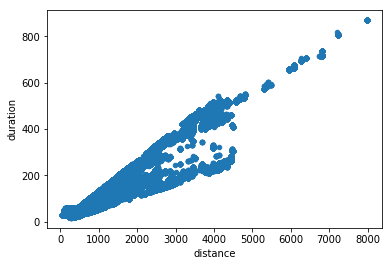

In [49]:
filtered_data.plot.scatter(x='distance', y='duration');